In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer


In [205]:
df = pd.read_csv("train.csv")  #loading file 
df

,Unnamed: 0,LBDHDD_outcome,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,RIAGENDR,INDFMPIR,DMDMARTZ,RIDAGEYR,RIDRETH1,RIDRETH3,BMXBMI,BMXWAIST,ALQ111,ALQ121
0,1,51.169706,1459,39.95,152.46,50.34,13.6,78.41,18.062,29.440,...,2,2.17,1,72,5,7,34.3,115.1,1,10
1,2,64.129747,2116,82.54,213.12,75.49,12.7,103.08,48.495,23.529,...,2,1.03,1,61,2,2,22.6,77.3,1,7
2,3,43.333345,2417,61.59,242.22,69.35,14.7,104.62,30.182,31.087,...,1,3.31,1,40,3,3,27.9,106.5,1,3
3,4,58.853188,2018,39.99,206.45,50.56,17.2,42.75,12.418,13.011,...,2,3.82,1,74,3,3,36.5,112.2,1,1
4,5,40.239688,2331,89.59,307.36,161.17,20.1,85.28,22.278,30.190,...,1,2.58,2,80,3,3,24.9,102.6,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,51.092076,2162,70.90,231.99,113.23,22.6,111.32,39.460,33.882,...,1,2.76,1,69,3,3,29.0,96.6,1,8
996,997,46.900117,1342,48.33,193.50,69.57,30.0,42.97,8.269,16.702,...,1,2.74,2,67,3,3,31.4,113.5,1,5
997,998,50.697536,3003,119.21,321.88,35.50,20.8,135.57,63.759,29.631,...,1,1.26,1,31,3,3,42.6,138.7,1,0
998,999,60.162095,2274,64.96,258.85,108.20,11.5,85.65,25.015,34.239,...,1,2.39,1,27,3,3,24.3,79.6,1,5


In [206]:
df.info() #checking the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1000 non-null   int64  
 1   LBDHDD_outcome  1000 non-null   float64
 2   DR1TKCAL        1000 non-null   int64  
 3   DR1TPROT        1000 non-null   float64
 4   DR1TCARB        1000 non-null   float64
 5   DR1TSUGR        1000 non-null   float64
 6   DR1TFIBE        1000 non-null   float64
 7   DR1TTFAT        1000 non-null   float64
 8   DR1TSFAT        1000 non-null   float64
 9   DR1TMFAT        1000 non-null   float64
 10  DR1TPFAT        1000 non-null   float64
 11  DR1TCHOL        1000 non-null   int64  
 12  DR1TATOC        1000 non-null   float64
 13  DR1TATOA        1000 non-null   float64
 14  DR1TRET         1000 non-null   int64  
 15  DR1TVARA        1000 non-null   int64  
 16  DR1TACAR        1000 non-null   int64  
 17  DR1TBCAR        1000 non-null   in

In [207]:
df = df.drop(columns=['Unnamed: 0']) #dropping the unnamed column
df.shape

(1000, 96)

In [208]:
df.corr()['LBDHDD_outcome'].sort_values(ascending=False)


LBDHDD_outcome    1.000000
RIAGENDR          0.522740
DR1TNUMF          0.188157
DR1TALCO          0.170589
INDFMPIR          0.169201
                    ...   
BMXBMI           -0.483975
BMXWAIST         -0.595812
DRABF                  NaN
DR1MRESP               NaN
ALQ111                 NaN
Name: LBDHDD_outcome, Length: 96, dtype: float64

In [209]:
df[["DRABF", "DR1MRESP", "ALQ111"]].nunique(dropna=True) #checking for num of unique values


DRABF       1
DR1MRESP    1
ALQ111      1
dtype: int64

In [210]:
df = df.drop(columns=['DRABF','DR1MRESP','ALQ111']) #dropping the useless columns
df.shape

(1000, 93)

In [211]:
y = df["LBDHDD_outcome"]
y.describe()

count    1000.000000
mean       54.733860
std         9.010594
min        30.034304
25%        47.994034
50%        54.159576
75%        60.879150
max        86.705504
Name: LBDHDD_outcome, dtype: float64

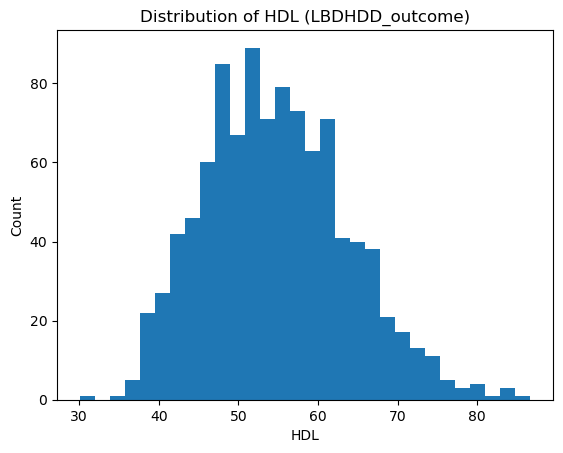

In [212]:
# histogram of hdl cholesterol
plt.figure()
plt.hist(y.dropna(), bins=30)
plt.title("Distribution of HDL (LBDHDD_outcome)")
plt.xlabel("HDL")
plt.ylabel("Count")
plt.show()

looks roughly bellshape so no transformation was done

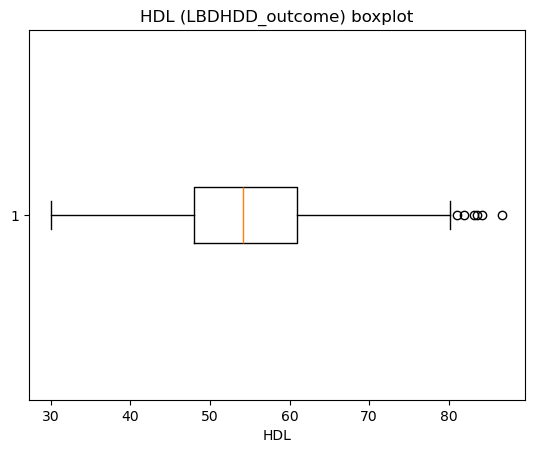

In [213]:
# boxplot for outliers
plt.figure()
plt.boxplot(y.dropna(), vert=False)
plt.title("HDL (LBDHDD_outcome) boxplot")
plt.xlabel("HDL")
plt.show()

In [214]:
y = df["LBDHDD_outcome"]
print("min:", y.min(), "max:", y.max())
print(y.quantile([0.001, 0.01, 0.99, 0.999]))


min: 30.0343043646765 max: 86.705503902511
0.001    34.413572
0.010    38.150264
0.990    77.593479
0.999    84.204128
Name: LBDHDD_outcome, dtype: float64


looks like valid outliers

## Models

In [215]:

X = df.drop(columns=["LBDHDD_outcome"])

# splitting and setting random state for reproductivity
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [216]:
# rmse

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


### Baseline

In [217]:
y_pred_base = np.full(len(y_valid), y_train.mean())
rmse_base = rmse(y_valid, y_pred_base)
print(rmse_base)


9.236248367631827


### Ridge Regression

In [218]:

ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)

rmse_ridge_train = rmse(y_train, ridge.predict(X_train))
rmse_ridge_valid = rmse(y_valid, ridge.predict(X_valid))

print(rmse_ridge_train, rmse_ridge_valid)


5.151220727534377 5.9011801115625975


### Random Forest

In [219]:


rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    min_samples_leaf=2
)

rf.fit(X_train, y_train)

rmse_rf_train = rmse(y_train, rf.predict(X_train))
rmse_rf_valid = rmse(y_valid, rf.predict(X_valid))

print(rmse_rf_train, rmse_rf_valid)


1.9866050377100284 5.132776562596144


### XGBoost

In [220]:


xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="rmse"
)

xgb.fit(X_train, y_train)

rmse_xgb_train = rmse(y_train, xgb.predict(X_train))
rmse_xgb_valid = rmse(y_valid, xgb.predict(X_valid))

print(rmse_xgb_train, rmse_xgb_valid)


0.2973342423130048 5.054164672273033


In [221]:
cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=3,
    loss_function="RMSE",
    random_seed=42,
    verbose=0
)

cat.fit(X_train, y_train)

rmse_cat_train = rmse(y_train, cat.predict(X_train))
rmse_cat_valid = rmse(y_valid, cat.predict(X_valid))

print(rmse_cat_train, rmse_cat_valid)

0.7647191020014164 5.018352228735383


In [222]:

results = pd.DataFrame([
    {"Model": "Mean baseline", "Train_RMSE": None,            "Valid_RMSE": rmse_base},
    {"Model": "Ridge",         "Train_RMSE": rmse_ridge_train,"Valid_RMSE": rmse_ridge_valid},
    {"Model": "RandomForest",  "Train_RMSE": rmse_rf_train,   "Valid_RMSE": rmse_rf_valid},
    {"Model": "XGBoost",       "Train_RMSE": rmse_xgb_train,  "Valid_RMSE": rmse_xgb_valid},
    {"Model": "CatBoost",      "Train_RMSE": rmse_cat_train,  "Valid_RMSE": rmse_cat_valid},
]).sort_values("Valid_RMSE")

results

,Model,Train_RMSE,Valid_RMSE
4,CatBoost,0.764719,5.018352
3,XGBoost,0.297334,5.054165
2,RandomForest,1.986605,5.132777
1,Ridge,5.151221,5.901180
0,Mean baseline,NaN,9.236248


In [223]:
# 5-fold CV for XGBoost vs CatBoost (fair comparison)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scorer = make_scorer(lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp)))

for name, model in [("XGBoost", xgb_cv), ("CatBoost", cat_cv)]:
    scores = cross_val_score(model, X_full, y_full, cv=kf, scoring=rmse_scorer, n_jobs=-1)
    rmse_folds = -scores
    print(name, "folds:", rmse_folds)
    print(name, "mean:", rmse_folds.mean(), "std:", rmse_folds.std(), "\n")

XGBoost folds: [5.06850996 4.6208744  4.50477393 4.61766958 4.96001367]
XGBoost mean: 4.754368307257119 std: 0.2189883588610712 

CatBoost folds: [5.03811092 4.55361759 4.56310689 4.66893564 4.83804264]
CatBoost mean: 4.73236273755086 std: 0.1839948696126808 



In [224]:

y_full = df["LBDHDD_outcome"]
X_full = df.drop(columns=["LBDHDD_outcome"])

test_df = pd.read_csv("test.csv")
X_test = test_df[X_full.columns].copy()

# Train final CatBoost
final_cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=3,
    loss_function="RMSE",
    random_seed=42,
    verbose=0
)
final_cat.fit(X_full, y_full)

# Predict + save
preds = final_cat.predict(X_test)

pred_out = pd.DataFrame({"pred": preds})
pred_out.to_csv("pred.csv", index=False)